In [72]:
import os
from bs4 import BeautifulSoup as bs
import datetime as dt
import json
import nltk
import numpy as np
import pandas as pd
import pickle
import pprint
import re
import requests
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller 
import statsmodels.api as sm
from pmdarima import auto_arima
import matplotlib.pyplot as plt
%matplotlib inline
# import yfinance as yf
# from sqlalchemy import create_engine
# import psycopg2
# from config import db_password
import warnings
warnings.filterwarnings("ignore")

In [73]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
# from hvplot import hvPlot
from sklearn.decomposition import PCA
import hvplot.pandas

from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

In [74]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import resample

In [75]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import resample

In [76]:
# 1. Data retrieval from csv file

def prepare_data(filename):
    df = pd.read_csv(f'{filename}.csv')
    return df
filename = 'stocks_10companies_5_sectors'
df = prepare_data(filename)

In [6]:
df

,ticker,date,code,open,high,low,close,adjclose,volume,gics_sector
0,CLX,2020-01-02,CLX_2020-01-02,153.380005,153.410004,151.550003,152.610001,143.581375,1292500.0,Consumer Staples
1,CLX,2020-01-03,CLX_2020-01-03,152.570007,153.880005,151.240005,152.910004,143.863647,809800.0,Consumer Staples
2,CLX,2020-01-06,CLX_2020-01-06,153.070007,153.940002,152.289993,153.369995,144.296387,869300.0,Consumer Staples
3,CLX,2020-01-07,CLX_2020-01-07,153.190002,153.289993,151.509995,151.520004,142.555878,1198200.0,Consumer Staples
4,CLX,2020-01-08,CLX_2020-01-08,151.779999,153.339996,150.949997,151.970001,142.979218,901200.0,Consumer Staples
...,...,...,...,...,...,...,...,...,...,...
31945,WELL,2022-07-11,WELL_2022-07-11,82.019997,82.599998,81.470001,82.110001,82.110001,971000.0,Real Estate
31946,WELL,2022-07-12,WELL_2022-07-12,81.669998,83.519997,81.610001,82.440002,82.440002,1467900.0,Real Estate
31947,WELL,2022-07-13,WELL_2022-07-13,81.540001,82.199997,80.820000,81.910004,81.910004,2150400.0,Real Estate
31948,WELL,2022-07-14,WELL_2022-07-14,80.500000,81.660004,79.779999,80.099998,80.099998,2771100.0,Real Estate


In [7]:
dfs = dict(tuple(df.groupby('ticker')))

In [8]:
dfs

{'AAP':      ticker        date            code        open        high         low  \
 6390    AAP  2020-01-02  AAP_2020-01-02  160.470001  160.949997  157.529999   
 6391    AAP  2020-01-03  AAP_2020-01-03  158.029999  159.630005  157.250000   
 6392    AAP  2020-01-06  AAP_2020-01-06  157.740005  158.889999  156.429993   
 6393    AAP  2020-01-07  AAP_2020-01-07  156.899994  157.399994  152.410004   
 6394    AAP  2020-01-08  AAP_2020-01-08  154.850006  156.050003  153.139999   
 ...     ...         ...             ...         ...         ...         ...   
 7024    AAP  2022-07-11  AAP_2022-07-11  182.899994  183.619995  180.619995   
 7025    AAP  2022-07-12  AAP_2022-07-12  181.759995  186.399994  181.759995   
 7026    AAP  2022-07-13  AAP_2022-07-13  181.990005  186.449997  180.899994   
 7027    AAP  2022-07-14  AAP_2022-07-14  182.410004  186.369995  182.000000   
 7028    AAP  2022-07-15  AAP_2022-07-15  188.190002  190.000000  186.270004   
 
            close    adjclose  

In [9]:
# 2. Create data frames for each ticker of particular sector for first segment
def get_adjclosing_value(data):
    dfs = {}
    dfs = dict(tuple(data.groupby('ticker')))
    # 3. Get "adjclose" values and create a data frame of tickers\
    df_adjclose = {}
    for df in dfs:
        dfs[df].set_index('date', inplace = True)
        df_adjclose[df] = dfs[df].adjclose 
    # print(df_t1_close)
    df_adjclose  = pd.DataFrame(df_adjclose)
    return df_adjclose 
get_adjclosing_value(df)

,AAP,AAPL,ABT,AMAT,AMD,AMGN,AMT,AMZN,AVB,BIIB,...,PSA,PYPL,SBUX,SPG,STZ,SWKS,TSLA,UNH,WELL,WMT
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,153.283569,73.785904,83.297440,60.680820,49.099998,222.913177,217.444458,94.900497,190.337555,294.239990,...,195.609177,110.750000,85.087051,126.021042,181.498627,117.296616,86.052002,281.931519,73.047607,114.296684
2020-01-03,153.293182,73.068565,82.281967,59.715004,48.599998,221.399857,217.549149,93.748497,192.165237,290.850006,...,197.718674,108.760002,84.591858,126.246880,182.684189,114.385162,88.601997,279.078461,74.332832,113.287689
2020-01-06,150.773880,73.650803,82.713074,58.427242,48.389999,223.098831,217.492020,95.143997,192.486649,290.820007,...,198.421829,110.169998,83.925255,126.906967,183.522766,112.370293,90.307999,281.015808,75.463081,113.057053
2020-01-07,148.985367,73.304428,82.253235,60.114990,48.250000,221.000626,212.857666,95.343002,188.298599,290.089996,...,197.635391,109.669998,83.668152,125.465141,176.968384,113.440392,93.811996,279.319366,74.970863,112.009598
2020-01-08,147.273773,74.483604,82.588531,60.075970,47.830002,221.167755,214.703827,94.598503,189.079254,292.660004,...,197.996262,111.820000,84.639473,126.290283,183.416733,115.243179,98.428001,285.208679,74.989113,111.625221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-11,181.750000,144.869995,108.408142,88.620003,76.949997,247.779999,257.989990,111.750000,190.550003,215.259995,...,313.799988,70.470001,77.900002,97.220001,241.139999,95.419998,703.030029,516.950012,82.110001,125.449997
2022-07-12,183.839996,145.860001,107.820755,88.730003,76.360001,246.970001,255.490005,109.220001,191.339996,215.580002,...,307.369995,71.430000,77.760002,97.599998,240.559998,96.510002,699.210022,514.419983,82.440002,125.070000
2022-07-13,185.339996,145.490005,105.740005,89.080002,77.519997,247.089996,255.919998,110.400002,190.550003,214.529999,...,306.079987,71.360001,77.919998,95.559998,244.979996,97.879997,711.119995,501.239990,81.910004,125.370003


In [10]:
# # 4. Extract "adjclose" values and create a data frame of tickers

# def buy_sell(cumpct):
#     if cumpct >= 2:
#         return 1
#     elif cumpct <= -2:
#         return -1
#     else:
#         return 0

# def calc_indicators():
#     Rf = 2.442 # 3 month
#     nrow = 638
#     df_adjclose = {}  
#     df_hl = {}
#     df_vol = {}
#     df_co = {}
#     for df in dfs:
#         # dfs[df].set_index('date', inplace = True)
#         df_adjclose[df] = dfs[df].adjclose
#         df_hl[df] = dfs[df].high - dfs[df].low
#         df_vol[df] = dfs[df].volume
#         df_co[df] = dfs[df].close - dfs[df].open
#     df_adjclose = pd.DataFrame(df_adjclose)
#     df_hl = pd.DataFrame(df_hl)
#     df_vol = pd.DataFrame(df_vol)
#     df_co = pd.DataFrame(df_co)
    
#     returns = (df_adjclose.pct_change()*100).mean()
#     cumulative_return = ((df_adjclose.iloc[638, :] / df_adjclose.iloc[0, :].values) - 1)*100
#     volatility = (df_adjclose.pct_change()*100).std()
#     adj_clo = df_adjclose.mean()
    
#     hl = df_hl.mean()
#     co = df_co.mean()
#     vol = df_vol.mean()
    
#     sharpe_ratio = (cumulative_return - Rf) / volatility
#     df_return = pd.concat([returns, volatility, cumulative_return, sharpe_ratio, hl, co, adj_clo, vol],  axis = 1)
#     df_return.columns = ["Returns","Volatility", "Cumulative_Return", "Sharpe Ratio", 'HL', 'Close_Open', 'AdjClose', 'Volume']

#     # Lambda function to add class information in to the dataframe
#     df_return['Class'] = calc_indicators().apply(lambda row: buy_sell(row['Cumulative_Return']), axis=1)
#     return df_return

In [11]:
Rf = 2.442 # 3 month
nrow = 638
df_adjclose = {}  
df_hl = {}
df_vol = {}
df_co = {}
for df in dfs:
    dfs[df].set_index('date', inplace = True)
    df_adjclose[df] = dfs[df].adjclose
    df_hl[df] = dfs[df].high - dfs[df].low
    df_vol[df] = dfs[df].volume
    df_co[df] = dfs[df].close - dfs[df].open
    df_adjclose = pd.DataFrame(df_adjclose)
    df_hl = pd.DataFrame(df_hl)
    df_vol = pd.DataFrame(df_vol)
    df_co = pd.DataFrame(df_co)    
returns = (df_adjclose.pct_change()*100).mean()
cumulative_return = ((df_adjclose.iloc[638, :] / df_adjclose.iloc[0, :].values) - 1)*100
volatility = (df_adjclose.pct_change()*100).std()
adj_clo = df_adjclose.mean()
    
hl = df_hl.mean()
co = df_co.mean()
vol = df_vol.mean()
    
sharpe_ratio = (cumulative_return - Rf) / volatility
df_return = pd.concat([returns, volatility, cumulative_return, sharpe_ratio, hl, co, adj_clo, vol],  axis = 1)
df_return.columns = ["Returns","Volatility", "Cumulative_Return", "Sharpe Ratio", 'HL', 'Close_Open', 'AdjClose', 'Volume']

In [12]:
df_return

,Returns,Volatility,Cumulative_Return,Sharpe Ratio,HL,Close_Open,AdjClose,Volume
AAP,0.060492,2.343571,23.111699,8.819745,4.859828,-0.039296,173.787369,8.730934e+05
AAPL,0.138593,2.331508,103.521256,43.353604,3.147058,0.103834,125.839614,1.175994e+08
ABT,0.060635,1.937340,30.640270,14.555148,2.383271,0.013490,108.482611,5.978483e+06
AMAT,0.123611,3.277319,55.683461,16.245430,3.582410,-0.043255,100.865555,8.249766e+06
AMD,0.139396,3.492412,65.193489,17.967950,3.741674,-0.074444,87.744945,6.629519e+07
AMGN,0.033419,1.811061,11.563616,5.036613,5.213098,0.072958,224.148337,2.832463e+06
AMT,0.048524,2.108420,18.283085,7.513248,6.073678,0.056072,243.287453,1.963400e+06
AMZN,0.055853,2.352625,19.651642,7.315081,3.881307,-0.083993,147.900696,8.291895e+07
AVB,0.027686,2.257708,1.288468,-0.510931,4.685759,-0.057183,189.415403,8.771180e+05
BIIB,0.008555,3.486959,-26.247281,-8.227594,8.474240,0.147246,271.458983,1.482287e+06


In [13]:
def buy_sell(cumpct):
    if cumpct >= 2:
        return 1
    elif cumpct <= -2:
        return -1
    else:
        return 0

In [15]:
# Lambda function to add class information in to the dataframe
df_return['Class'] = df_return.apply(lambda row: buy_sell(row['Cumulative_Return']), axis=1)

In [16]:
df_return.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, AAP to WMT
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Returns            50 non-null     float64
 1   Volatility         50 non-null     float64
 2   Cumulative_Return  50 non-null     float64
 3   Sharpe Ratio       50 non-null     float64
 4   HL                 50 non-null     float64
 5   Close_Open         50 non-null     float64
 6   AdjClose           50 non-null     float64
 7   Volume             50 non-null     float64
 8   Class              50 non-null     int64  
dtypes: float64(8), int64(1)
memory usage: 3.9+ KB


## Preprocessing

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
y=df_return['Class']
X = df_return.drop(columns='Class')

In [19]:
def split_std_scaler():
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, y_train, y_test 

In [20]:
def split_min_max_scaler():
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    X_scaled = MinMaxScaler().fit_transform(X)
    
    return X_scaled

## Modeling

Supervised 

1. Linear Regression
2. Logistic Regression
3. Decision Trees
4. Ensemble Learning
5. Random Forest

Non-supervised
1. PCA
2. KMeans Clustering
3. Hierachial Clustering
4. ARIMA/ SARIMA

Neural Network/ Deep Learning/ LSTM

NLP

In [ ]:
def select_ML(ml):
    if ml == "PCA":
        pca()
    elif:
        ml == KMeans:
            kmeans()
    elif:
        ml == Hierachial:
            hierachial()
    elif:
        ml == arima:
            arima()
    elif:
        ml == lr:
            lr()
    elif:
        ml == dt:
            dt()
    elif:
        ml == arima()
    elif:
        ml == lr:
            el()
    elif:
        ml == rf:
            rf()
    elif:
        ml = nn:
            nn()      

## Supervised Learning

### 1. Random Forest

In [21]:
def rf():
    X_train_scaled, X_test_scaled, y_train, y_test = split_std_scaler() 
    clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)  
    features = clf.feature_importances_
    # print(features)
    plt.bar(x = range(len(features)), height=features)
    print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
    print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

    return clf, plt.show(), print(features)

Training Score: 1.0
Testing Score: 1.0


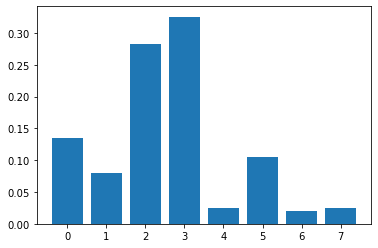

[0.13478537 0.08023377 0.28337043 0.32571828 0.02451431 0.10558634
 0.02080719 0.02498431]


(RandomForestClassifier(n_estimators=500, random_state=1), None, None)

In [22]:
rf()

In [23]:
# from sklearn.feature_selection import SelectFromModel
# sel = SelectFromModel(clf)
# sel.fit(X_train_scaled, y_train)
# sel.get_support()

In [24]:
# X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
# scaler = StandardScaler().fit(X_selected_train)
# X_selected_train_scaled = scaler.transform(X_selected_train)
# X_selected_test_scaled = scaler.transform(X_selected_test)

In [25]:
def erf():
    from sklearn.ensemble import RandomForestClassifier
    X_train_scaled, X_test_scaled, y_train, y_test = split_std_scaler()
    clf = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
    print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
    print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
    return

In [26]:
erf()

Training Score: 1.0
Testing Score: 1.0


### 2. Logistic Regression

In [27]:
def logreg():
    X_train_scaled, X_test_scaled, y_train, y_test = split_std_scaler()
    clf = LogisticRegression().fit(X_train_scaled, y_train)
    print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
    print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
    return
logreg()

Training Score: 0.972972972972973
Testing Score: 1.0


### Decision Trees

In [28]:
def decision_tree():
    X_train_scaled, X_test_scaled, y_train, y_test = split_std_scaler()
    clf = DecisionTreeClassifier().fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    cm
    return
decision_tree()

In [29]:
# # Create a DataFrame from the confusion matrix.
# cm_df = pd.DataFrame(
#     cm, index=["Actual 1", "Actual 0", "Actual -1"], columns=["Predicted 1", "Predicted 0", "Predicted -1"])

# cm_df

In [30]:
def decision_tree_clf():
    clfs = []
    scores = []
    for i in range(50):

        # Sample the data for each new tree
        X_train_scaled, X_test_scaled, y_train, y_test = split_std_scaler()
        X_train_scaled_bootstrap, y_train_bootstrap = resample(X_train_scaled, y_train, random_state=i)

        # Create a decision tree and append it to our list of classifiers
        clf = DecisionTreeClassifier(random_state=i+200).fit(X_train_scaled_bootstrap, y_train_bootstrap)
        clfs.append(clf)

        # Take the median score of all the created classifiers
        y_preds = [clf.predict(X_test_scaled) for clf in clfs]
        y_pred = pd.DataFrame(y_preds).median().round()
        score = score = accuracy_score(y_test, y_pred)
        scores.append(score)

    plt.plot(scores)
    plt.show()
    print(f'score: {score}')
    return

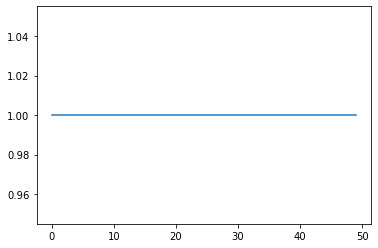

score: 1.0


In [31]:
decision_tree_clf()

In [32]:
def extra_trees():
    from sklearn.ensemble import ExtraTreesClassifier
    X_train_scaled, X_test_scaled, y_train, y_test = split_std_scaler()
    clf = ExtraTreesClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
    print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
    print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
    return
extra_trees()

Training Score: 1.0
Testing Score: 1.0


In [ ]:
## Add helper boost functions

In [ ]:
# from boost_helper_functions import bootstrap, get_estimator_weight, new_sample_weights

# n_estimators = 50

# estimator_weights = np.zeros(n_estimators)
# estimators = [DecisionTreeClassifier(max_depth=2) for i in range(n_estimators)]

# sample_weights = np.ones(len(X_train_scaled)) / len(X_train_scaled)
# for i in range(50):
#     estimator = estimators[i]
    
#     # Fit the estimator to a bootstrapped sample
#     X_bootstrap, y_bootstrap = bootstrap(X_train_scaled, y_train, sample_weights, random_state=1)
#     estimator.fit(X_bootstrap, y_bootstrap)
    
#     # Calculate the amount that each sample contributes to the total error
#     y_predict = estimator.predict(X_train_scaled)
#     errors = np.abs(y_predict - y_train)
#     normalized_errors = errors / np.abs(y_predict - y_train).max()
        
#     # Calculate how much say this estimator should have in the final prediction
#     estimator_weights[i] = get_estimator_weight(sample_weights, normalized_errors)
    
#     # Calculate which samples the next estimator should focus on more
#     sample_weights = new_sample_weights(sample_weights, normalized_errors)
    
# y_preds = [reg.predict(X_test_scaled) for reg in estimators]
# y_pred = pd.DataFrame(y_preds).median().round()
# print(classification_report(y_test, y_pred))

In [ ]:
def adb_clf():
    from sklearn.ensemble import AdaBoostClassifier
    X_train_scaled, X_test_scaled, y_train, y_test = split_std_scaler()
    clf = AdaBoostClassifier(random_state=1, n_estimators=50, base_estimator=DecisionTreeClassifier(max_depth=2)).fit(X_train_scaled, y_train)
    print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
    print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
    return

In [ ]:
adb_clf()

### Multiple Linear Regression

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [ ]:
X, y = make_regression(n_samples=20, n_features=1, random_state=0, noise=4, bias=100.0)

In [ ]:
X.reshape(-1, 1)

In [ ]:
X1=df_return['Cumulative_Return']

In [ ]:
model = LinearRegression()

In [ ]:
# model.fit(X1, y)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with MSE and R2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

In [ ]:
model.score(X, y)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

In [ ]:
classifier.fit(X_train, y_train)

In [ ]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [ ]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

In [ ]:
def svm():
    from sklearn.svm import SVC
    from sklearn.preprocessing import StandardScaler
    from sklearn.datasets import make_classification
    from sklearn.model_selection import train_test_split
    from sklearn.pipeline import Pipeline
   
    pipe = Pipeline([('scaler', split_std_scaler()), ('svc', SVC())])
    # The pipeline can be used as any other estimator
    # and avoids leaking the test set into the train set
    pipe.fit(X_train, y_train)

    pipe.score(X_test, y_test)
    return

In [ ]:
svm()

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
X, y = make_classification(n_features=4, random_state=0)
clf = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=0, tol=1e-5))
clf.fit(X, y)

In [ ]:
print(clf.named_steps['linearsvc'].coef_)

In [ ]:
print(clf.named_steps['linearsvc'].intercept_)

print(clf.predict([[0, 0, 0, 0]]))

## Non-Supervised Learning

In [33]:
import os
import pandas as pd
import numpy as np
import csv
import re
import pandas_datareader.data as pdr
#from pandas_datareader import data as pdr
import yfinance as yf
import pickle
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
# from hvplot import hvPlot
# Import PCA from sci-kit learn
from sklearn.decomposition import PCA
import hvplot.pandas

from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [36]:
os.getcwd()

'/Users/wimal/Documents/DataScience/UNC/Stock_Market_Analysis/exploraory_analysis'

### PCA

In [38]:
# X_train_scaled, X_test_scaled, y_train, y_test = split_std_scaler() 

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#     scaler = StandardScaler().fit(X_train)
#     X_train_scaled = scaler.transform(X_train)

In [51]:
df_return

,Returns,Volatility,Cumulative_Return,Sharpe Ratio,HL,Close_Open,AdjClose,Volume,Class
AAP,0.060492,2.343571,23.111699,8.819745,4.859828,-0.039296,173.787369,8.730934e+05,1
AAPL,0.138593,2.331508,103.521256,43.353604,3.147058,0.103834,125.839614,1.175994e+08,1
ABT,0.060635,1.937340,30.640270,14.555148,2.383271,0.013490,108.482611,5.978483e+06,1
AMAT,0.123611,3.277319,55.683461,16.245430,3.582410,-0.043255,100.865555,8.249766e+06,1
AMD,0.139396,3.492412,65.193489,17.967950,3.741674,-0.074444,87.744945,6.629519e+07,1
AMGN,0.033419,1.811061,11.563616,5.036613,5.213098,0.072958,224.148337,2.832463e+06,1
AMT,0.048524,2.108420,18.283085,7.513248,6.073678,0.056072,243.287453,1.963400e+06,1
AMZN,0.055853,2.352625,19.651642,7.315081,3.881307,-0.083993,147.900696,8.291895e+07,1
AVB,0.027686,2.257708,1.288468,-0.510931,4.685759,-0.057183,189.415403,8.771180e+05,0
BIIB,0.008555,3.486959,-26.247281,-8.227594,8.474240,0.147246,271.458983,1.482287e+06,-1


In [52]:
stock = df_return.drop(columns=['Class'])

In [54]:
stock_scaled = StandardScaler().fit_transform(stock)
print(stock_scaled_scaled[0:5])

NameError: name 'stock_scaled_scaled' is not defined

In [55]:
pca = PCA(n_components=3)

In [59]:
stocks_pca = pca.fit_transform(stock_scaled)

In [60]:
# Transform PCA data to a DataFrame
df_stocks_pca = pd.DataFrame(
    data=stocks_pca, columns=["principal component 1", "principal component 2", "principal component 3"]
)
df_stocks_pca.head()

,principal component 1,principal component 2,principal component 3
0,-0.358296,-0.108541,-0.659604
1,1.431355,0.167572,3.957927
2,-0.811566,0.422548,0.169805
3,0.349397,-0.983142,0.097532
4,0.965744,-1.829456,1.834054


In [61]:
pca.explained_variance_ratio_

array([0.53165273, 0.19043838, 0.15386205])

### KMeans

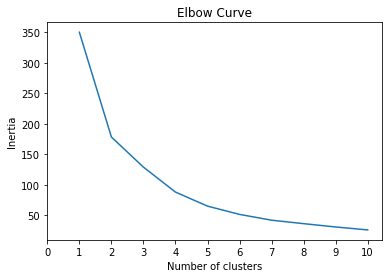

In [62]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_stocks_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [63]:
# Predicting clusters with k=3

# Initialize the k-means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(df_stocks_pca)

# Predict clusters
predictions = model.predict(df_stocks_pca)

# Add the predicted class column to the dataframe
df_stocks_pca["class"] = model.labels_
df_stocks_pca.head()

,principal component 1,principal component 2,principal component 3,class
0,-0.358296,-0.108541,-0.659604,1
1,1.431355,0.167572,3.957927,0
2,-0.811566,0.422548,0.169805,2
3,0.349397,-0.983142,0.097532,1
4,0.965744,-1.829456,1.834054,0


In [65]:
y=df_stocks_pca['principal component 2']

In [66]:
y.shape

(50,)

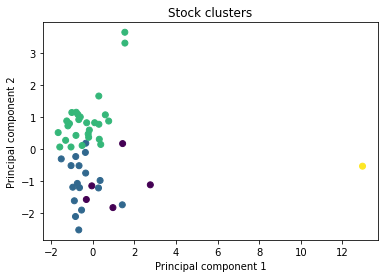

In [67]:
# Visualize the clusters
plt.scatter(x=df_stocks_pca['principal component 1'], y=df_stocks_pca['principal component 2'], c=df_stocks_pca['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Stock clusters')
plt.show()

In [71]:
kmeans =KMeans(n_clusters = 4).fit(X_scaled)
centroids = kmeans.cluster_centers_
plt.scatter(X_scaled[:,0],X_scaled[:,1], c = kmeans.labels_, cmap ="viridis")
plt.xlabel("y")
plt.scatter(centroids[:,0], centroids[:,1],color="red",marker="*")
plt.show()

NameError: name 'X_scaled' is not defined

In [ ]:
# stocks = pd.DataFrame(df_return.index)
# cluster_labels = pd.DataFrame(kmeans.labels_)
# stockClusters = pd.concat([stocks, cluster_labels],axis = 1)
# stockClusters.columns = ['Symbol','Cluster']
# x_df = pd.DataFrame(X, columns = ["Returns", "Volatitity", "Cumulative Return", "Sharpe Ratio", 'HL', 'Close_Open', 'Volume'])
# combined = pd.concat([stockClusters,x_df],axis=1)
# combined = combined.set_index("Symbol")
# combined

In [68]:
X = df_return
normalized = normalize(X)
mergings = linkage(normalized, method='ward')

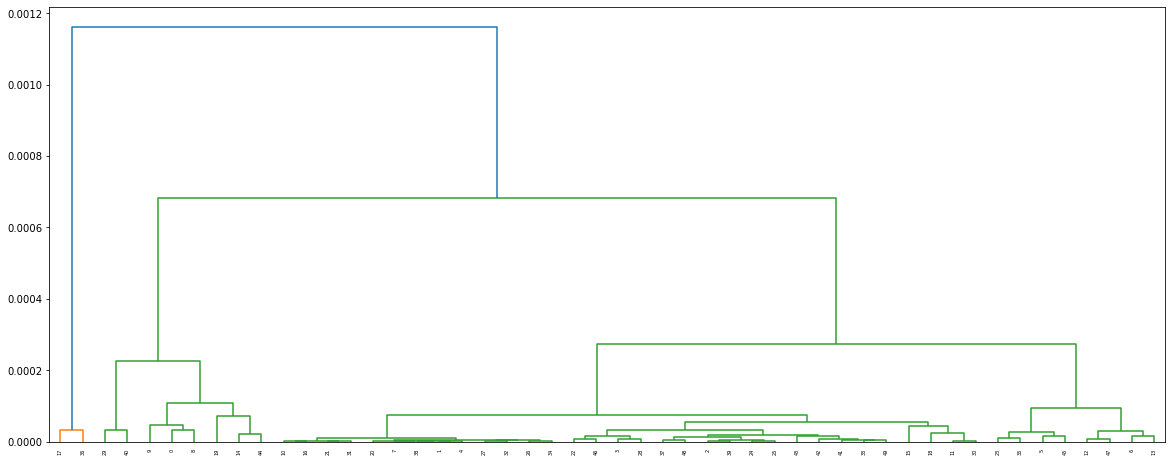

In [69]:
plt.figure(figsize=(20,8))

dendrogram(mergings,
          leaf_rotation=90,
          leaf_font_size=5)

plt.show()

## Supervised Learning

In [ ]:
df = pd.read_csv('ticker_AAPL.csv', parse_dates = True)

In [ ]:
df 

### ARIMA/ SARIMA

In [ ]:
df["Close"].plot(figsize=(15, 6)) 
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Closing price of Facebook stocks") 
plt.show()

In [ ]:
plt.figure(1, figsize=(15,6)) 
plt.subplot(211) 
df["Close"].hist() 
plt.subplot(212) 
df["Close"].plot(kind='kde') 
plt.show()

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MSE is : {metrics.mean_absolute_error(y_true, y_pred)}') 
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
    # Here is the ADF test function to check for stationary data:

def Augmented_Dickey_Fuller_Test_func(series , column_name): 
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value','No Lags Used','Number of Observations Used']) 
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value 
        print (dfoutput)
        if dftest[1] <= 0.05:
            print("Conclusion:====>") 
            print("Reject the null hypothesis") 
            print("Data is stationary")
        else:
            print("Conclusion:====>")
            print("Fail to reject the null hypothesis") 
            print("Data is non-stationary")

In [ ]:
Augmented_Dickey_Fuller_Test_func(df['Close' ],'Close')

In [ ]:
X = df[['Close' ]]
train, test = X[0:-60], X[-60:]

In [ ]:
stepwise_model = auto_arima(train,start_p=1, start_q=1, 
    max_p=7, max_q=7, seasonal=False,
d=None, trace=True,error_action='ignore',suppress_warnings=True, stepwise=True)
stepwise_model.summary()

In [ ]:
forecast,conf_int = stepwise_model.predict(n_periods=60, 
return_conf_int=True)
forecast = pd.DataFrame(forecast,columns=['close_pred'])
df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound', 'Lower_bound'])
df_conf["new_index"] = range(10387, 10447)
df_conf = df_conf.set_index("new_index")
timeseries_evaluation_metrics_func(test, forecast)
forecast["new_index"] = range(10387, 10447) 
forecast = forecast.set_index("new_index")

In [ ]:
import matplotlib.pyplot as plt 
get_ipython().run_line_magic('matplotlib', 'inline') 
plt.rcParams["figure.figsize"] = [16,8]
plt.plot( train, label='Train ')
plt.plot(test, label='Test ')
plt.plot(forecast, label='Predicted ') 
plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')
plt.legend(loc='best')
plt.show()

In [ ]:
stepwise_model.plot_diagnostics();

In [ ]:

df = pd.read_csv('ticker_AAPL.csv', parse_dates = True)
df.head(10)

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 
        print('Evaluation metric results:-')
        print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
        print(f'MSE is : {metrics.mean_absolute_error(y_true, y_pred)}') 
        print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
        print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
        print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

def Augmented_Dickey_Fuller_Test_func(series , column_name): 
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value','No Lags Used','Number of Observations Used']) 
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value 
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>") 
        print("Reject the null hypothesis") 
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis") 
        print("Data is non-stationary")

In [ ]:
Augmented_Dickey_Fuller_Test_func(df['Close' ],'Close')

In [ ]:
X = df[['Close' ]]
train, test = X[0:-30], X[-30:]

In [ ]:
for m in [1, 4,7,12,52]: 
    print("="*100)
    print(f' Fitting SARIMA for Seasonal value m = {str(m)}')

In [ ]:
for m in [1, 4,7,12,52]: 
    print("="*100)
    print(f' Fitting SARIMA for Seasonal value m = {str(m)}')

stepwise_model = auto_arima(train, start_p=1, start_q=1, 
        max_p=7, max_q=7, seasonal=True, start_P=1,
        start_Q=1, max_P=7, max_D=7, max_Q=7, m=m, 
        d=None, D=None, trace=True, error_action='ignore', suppress_warnings=True, 
        stepwise=True)
print(f'Model summary for m = {str(m)}') 
print("-"*100)
stepwise_model.summary()

forecast ,conf_int= stepwise_model.predict(n_periods = 30, return_conf_int=True)
df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound', 'Lower_bound'])
df_conf["new_index"] = range(10417, 10447)
df_conf = df_conf.set_index("new_index")
forecast = pd.DataFrame(forecast, columns=['close_pred']) 
forecast["new_index"] = range(10417, 10447)
forecast = forecast.set_index("new_index")

timeseries_evaluation_metrics_func(test, forecast)

import matplotlib.pyplot as plt 
get_ipython().run_line_magic('matplotlib', 'inline') 
plt.rcParams["figure.figsize"] = [15, 7] 
plt.plot(train, label='Train ')
plt.plot(test, label='Test ')
plt.plot(forecast, label=f'Predicted with m={str(m)} ') 
plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')

plt.legend(loc='best')
plt.show()
print("-"*100)
print(f' Diagnostic plot for Seasonal value m = {str(m)}')
display(stepwise_model.plot_diagnostics()); 
print("-"*100)

### Needs more work (Kernal died)

In [ ]:
stepwise_model.plot_diagnostics();

### Ensemble learning

In [ ]:
df_return

In [ ]:
df_sl = df_return.copy()

In [ ]:
# Function to assign class information (see below)
def buy_sell(cumpct):
    if cumpct >= 10:
        return 1
    elif cumpct <= -10:
        return -1
    else:
        return 0

In [ ]:
# Lambda function to add class information in to the dataframe
df_sl['Class'] = df_sl.apply(lambda row: buy_sell(row['Cumulative_Return']), axis=1)

In [ ]:
df_sl

In [ ]:
# result = pd.concat([df_return, df_summary], axis=1, join="inner")

In [ ]:
X = df_sl.drop(columns = ['Class'])

In [ ]:
y = df_sl['Class']

In [ ]:
# pip install imblearn

In [ ]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split

In [ ]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

In [ ]:
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 0", "Actual -1"], columns=["Predicted 1", "Predicted 0", "Predicted -1"])

cm_df

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

In [ ]:
clfs = []
scores = []
for i in range(50):
    
    # Sample the data for each new tree
    X_train_scaled_bootstrap, y_train_bootstrap = resample(X_train_scaled, y_train, random_state=i)
    
    # Create a random decision tree and append it to our list of classifiers
    clf = DecisionTreeClassifier(splitter='random', random_state=i+200).fit(X_train_scaled_bootstrap, y_train_bootstrap)
    clfs.append(clf)
    
    # Take the median score of all the created classifiers
    y_preds = [clf.predict(X_test_scaled) for clf in clfs]
    y_pred = pd.DataFrame(y_preds).median().round()
    score = score = accuracy_score(y_test, y_pred)
    scores.append(score)

plt.plot(scores)
plt.show()
print(f'score: {score}')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf_clf = BalancedRandomForestClassifier(n_estimators=100, random_state = 1)
brf_clf.fit(X_train, y_train)
y_pred = brf_clf.predict(X_test)

In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

In [ ]:
features = brf_clf.feature_importances_

In [ ]:
feature_list = sorted(zip(brf_clf.feature_importances_, X.columns), reverse=True)
for feature in feature_list:
    print(f'{feature[1]}: ({feature[0]})')

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(n_estimators=100, random_state = 1)
eec.fit(X_train, y_train)
y_pred = eec.predict(X_test)

In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

In [ ]:
# kmeans =KMeans(n_clusters = 4).fit(X_scaled)
# centroids = kmeans.cluster_centers_
# plt.scatter(X_scaled[:,0],X_scaled[:,1], c = kmeans.labels_, cmap ="viridis")
# plt.xlabel("y")
# plt.scatter(centroids[:,0], centroids[:,1],color="red",marker="*")
# plt.show()

In [ ]:
# stocks = pd.DataFrame(df_return.index)
# cluster_labels = pd.DataFrame(kmeans.labels_)
# stockClusters = pd.concat([stocks, cluster_labels],axis = 1)
# stockClusters.columns = ['Symbol','Cluster']
# x_df = pd.DataFrame(X, columns = ["Returns", "Volatitity", "Cumulative Return", "Sharpe Ratio", 'HL', 'Close_Open', 'Volume'])
# combined = pd.concat([stockClusters,x_df],axis=1)
# combined = combined.set_index("Symbol")
# combined

In [ ]:
# Creating dataframe for ARIMA/SARIMA

In [80]:
pwd

'/Users/wimal/Documents/DataScience/UNC/Stock_Market_Analysis/exploraory_analysis'

### ARIMA/ SARIMA

In [83]:
df = pd.read_csv('ticker_AAPL.csv', parse_dates = True)

In [84]:
df 

,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600,AAPL
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800,AAPL
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000,AAPL
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600,AAPL
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600,AAPL
...,...,...,...,...,...,...,...,...
10481,2022-07-11,145.669998,146.639999,143.779999,144.869995,144.869995,63141600,AAPL
10482,2022-07-12,145.759995,148.449997,145.050003,145.860001,145.860001,77588800,AAPL
10483,2022-07-13,142.990005,146.449997,142.119995,145.490005,145.490005,71185600,AAPL
10484,2022-07-14,144.080002,148.949997,143.250000,148.470001,148.470001,78140700,AAPL


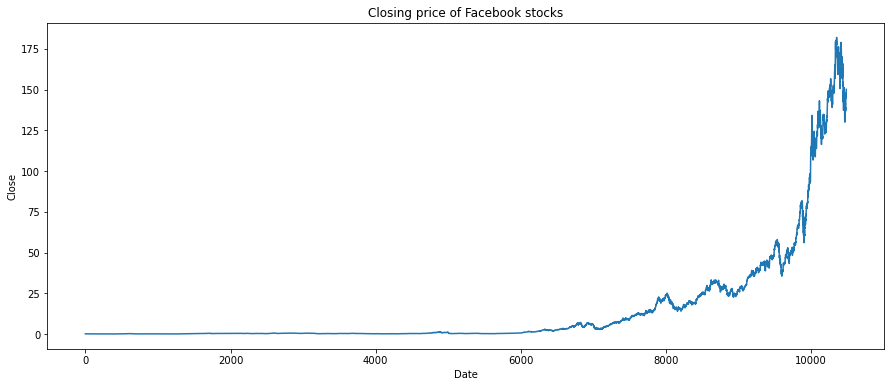

In [85]:
df["Close"].plot(figsize=(15, 6)) 
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Closing price of Facebook stocks") 
plt.show()

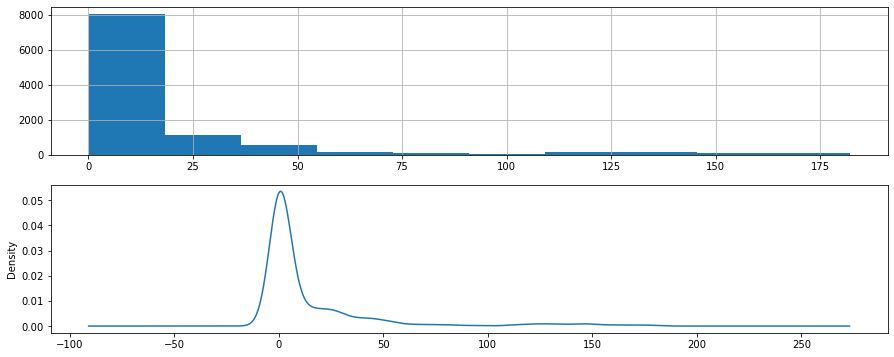

In [86]:
plt.figure(1, figsize=(15,6)) 
plt.subplot(211) 
df["Close"].hist() 
plt.subplot(212) 
df["Close"].plot(kind='kde') 
plt.show()

In [87]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MSE is : {metrics.mean_absolute_error(y_true, y_pred)}') 
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
    # Here is the ADF test function to check for stationary data:

def Augmented_Dickey_Fuller_Test_func(series , column_name): 
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value','No Lags Used','Number of Observations Used']) 
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value 
        print (dfoutput)
        if dftest[1] <= 0.05:
            print("Conclusion:====>") 
            print("Reject the null hypothesis") 
            print("Data is stationary")
        else:
            print("Conclusion:====>")
            print("Fail to reject the null hypothesis") 
            print("Data is non-stationary")

In [88]:
Augmented_Dickey_Fuller_Test_func(df['Close' ],'Close')

Results of Dickey-Fuller Test for column: Close
Test Statistic                     3.100161
p-value                            1.000000
No Lags Used                      39.000000
Number of Observations Used    10446.000000
Critical Value (1%)               -3.430976
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary
Test Statistic                     3.100161
p-value                            1.000000
No Lags Used                      39.000000
Number of Observations Used    10446.000000
Critical Value (1%)               -3.430976
Critical Value (5%)               -2.861817
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary
Test Statistic                     3.100161
p-value                            1.000000
No Lags Used                      39.000000
Number of Observations Used    10446.000000
Critical Value (1%)               -3.430976
Critical Value (5%)               -2.861817
Critical Value (10%)    

In [89]:
X = df[['Close' ]]
train, test = X[0:-60], X[-60:]

In [90]:
stepwise_model = auto_arima(train,start_p=1, start_q=1, 
    max_p=7, max_q=7, seasonal=False,
d=None, trace=True,error_action='ignore',suppress_warnings=True, stepwise=True)
stepwise_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.98 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=27928.744, Time=0.33 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=24699.141, Time=0.21 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.20 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=27926.744, Time=0.15 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=23524.635, Time=0.26 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=22715.509, Time=0.37 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=22174.871, Time=0.46 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=21981.954, Time=0.66 sec
 ARIMA(6,2,0)(0,0,0)[0] intercept   : AIC=21506.170, Time=0.65 sec
 ARIMA(7,2,0)(0,0,0)[0] intercept   : AIC=21481.843, Time=0.86 sec
 ARIMA(7,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=8.26 sec
 ARIMA(6,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.23 sec
 ARIMA(7,2,0)(0,0,0)[0]             : AIC=21479.843, Time=0.37 sec
 ARIMA(6,2,0)(0,0,0)[0]             : AIC=2

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10426
Model:               SARIMAX(7, 2, 0)   Log Likelihood              -10731.922
Date:                Sat, 30 Jul 2022   AIC                          21479.843
Time:                        11:05:56   BIC                          21537.858
Sample:                             0   HQIC                         21499.440
                              - 10426                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9070      0.002   -394.855      0.000      -0.912      -0.903
ar.L2         -0.7804      0.003   -241.123      0.000      -0.787      -0.774
ar.L3         -0.6727      0.004   -189.995      0.000      -0.680      -0.666
ar.L4         -0.5183      0.004   -137.746      0.000      -0.526      -0.511
ar.L5         -0.3596      0.004    -96.197      0.000      -0.367      -0.352
ar.L6         -0.2584      0.003    -75.206      0.000      -0.265      -0.252
ar.L7         -0.0506      0.003    -19.912      0.000      -0.056      -0.046
sigma2         0.4589      0.001    399.985      0.000       0.457       0.461
===================================================================================
Ljung-Box (L1) (Q):                   0.50   Jarque-Bera (JB):           1728484.01
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):           16489.16   Skew:                             0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                        66.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
forecast,conf_int = stepwise_model.predict(n_periods=60, 
return_conf_int=True)
forecast = pd.DataFrame(forecast,columns=['close_pred'])
df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound', 'Lower_bound'])
df_conf["new_index"] = range(10387, 10447)
df_conf = df_conf.set_index("new_index")
timeseries_evaluation_metrics_func(test, forecast)
forecast["new_index"] = range(10387, 10447) 
forecast = forecast.set_index("new_index")

In [ ]:
import matplotlib.pyplot as plt 
get_ipython().run_line_magic('matplotlib', 'inline') 
plt.rcParams["figure.figsize"] = [16,8]
plt.plot( train, label='Train ')
plt.plot(test, label='Test ')
plt.plot(forecast, label='Predicted ') 
plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')
plt.legend(loc='best')
plt.show()

In [ ]:
stepwise_model.plot_diagnostics();

In [ ]:
import warnings
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import statsmodels.api as sm 
from pmdarima import auto_arima 
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller 
warnings.filterwarnings("ignore")
df = pd.read_csv('ticker_AAPL.csv', parse_dates = True)
df.head(10)

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 
        print('Evaluation metric results:-')
        print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
        print(f'MSE is : {metrics.mean_absolute_error(y_true, y_pred)}') 
        print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
        print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
        print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

def Augmented_Dickey_Fuller_Test_func(series , column_name): 
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value','No Lags Used','Number of Observations Used']) 
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value 
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>") 
        print("Reject the null hypothesis") 
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis") 
        print("Data is non-stationary")

In [ ]:
Augmented_Dickey_Fuller_Test_func(df['Close' ],'Close')

In [ ]:
X = df[['Close' ]]
train, test = X[0:-30], X[-30:]

In [ ]:
for m in [1, 4,7,12,52]: 
    print("="*100)
    print(f' Fitting SARIMA for Seasonal value m = {str(m)}')

In [ ]:
for m in [1, 4,7,12,52]: 
    print("="*100)
    print(f' Fitting SARIMA for Seasonal value m = {str(m)}')

stepwise_model = auto_arima(train, start_p=1, start_q=1, 
        max_p=7, max_q=7, seasonal=True, start_P=1,
        start_Q=1, max_P=7, max_D=7, max_Q=7, m=m, 
        d=None, D=None, trace=True, error_action='ignore', suppress_warnings=True, 
        stepwise=True)
print(f'Model summary for m = {str(m)}') 
print("-"*100)
stepwise_model.summary()

forecast ,conf_int= stepwise_model.predict(n_periods = 30, return_conf_int=True)
df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound', 'Lower_bound'])
df_conf["new_index"] = range(10417, 10447)
df_conf = df_conf.set_index("new_index")
forecast = pd.DataFrame(forecast, columns=['close_pred']) 
forecast["new_index"] = range(10417, 10447)
forecast = forecast.set_index("new_index")

timeseries_evaluation_metrics_func(test, forecast)

import matplotlib.pyplot as plt 
get_ipython().run_line_magic('matplotlib', 'inline') 
plt.rcParams["figure.figsize"] = [15, 7] 
plt.plot(train, label='Train ')
plt.plot(test, label='Test ')
plt.plot(forecast, label=f'Predicted with m={str(m)} ') 
plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')

plt.legend(loc='best')
plt.show()
print("-"*100)
print(f' Diagnostic plot for Seasonal value m = {str(m)}')
display(stepwise_model.plot_diagnostics()); 
print("-"*100)

### Needs more work (Kernal died)

In [ ]:
stepwise_model.plot_diagnostics();

### Ensemble learning

In [ ]:
df_return

In [ ]:
df_sl = df_return.copy()

In [ ]:
# Function to assign class information (see below)
def buy_sell(cumpct):
    if cumpct >= 10:
        return 1
    elif cumpct <= -10:
        return -1
    else:
        return 0

In [ ]:
# Lambda function to add class information in to the dataframe
df_sl['Class'] = df_sl.apply(lambda row: buy_sell(row['Cumulative_Return']), axis=1)

In [ ]:
df_sl

In [ ]:
# result = pd.concat([df_return, df_summary], axis=1, join="inner")

In [ ]:
X = df_sl.drop(columns = ['Class'])

In [ ]:
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled

In [ ]:
y = df_sl['Class']

In [ ]:
# pip install imblearn

In [ ]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split

In [ ]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import resample

In [ ]:
clf = DecisionTreeClassifier().fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 0", "Actual -1"], columns=["Predicted 1", "Predicted 0", "Predicted -1"])

cm_df

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

In [ ]:
clfs = []
scores = []
for i in range(50):
    
    # Sample the data for each new tree
    X_train_scaled_bootstrap, y_train_bootstrap = resample(X_train_scaled, y_train, random_state=i)
    
    # Create a random decision tree and append it to our list of classifiers
    clf = DecisionTreeClassifier(splitter='random', random_state=i+200).fit(X_train_scaled_bootstrap, y_train_bootstrap)
    clfs.append(clf)
    
    # Take the median score of all the created classifiers
    y_preds = [clf.predict(X_test_scaled) for clf in clfs]
    y_pred = pd.DataFrame(y_preds).median().round()
    score = score = accuracy_score(y_test, y_pred)
    scores.append(score)

plt.plot(scores)
plt.show()
print(f'score: {score}')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf_clf = BalancedRandomForestClassifier(n_estimators=100, random_state = 1)
brf_clf.fit(X_train, y_train)
y_pred = brf_clf.predict(X_test)

In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

In [ ]:
features = brf_clf.feature_importances_

In [ ]:
feature_list = sorted(zip(brf_clf.feature_importances_, X.columns), reverse=True)
for feature in feature_list:
    print(f'{feature[1]}: ({feature[0]})')

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(n_estimators=100, random_state = 1)
eec.fit(X_train, y_train)
y_pred = eec.predict(X_test)

In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))